In [1]:
from nltk import data
from nltk.corpus.reader import CHILDESCorpusReader
from nltk.probability import FreqDist
import entropies7.entropies7 as Ent
from numpy import *
import scipy as sp
import numpy as np
import re
import os as os

%matplotlib inline
from pandas import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


In [2]:
def get_files(corpus):
    if corpus =='childes':
        corpus_root = data.find('corpora/childes/English-UK-MOR')
        eng = CHILDESCorpusReader(corpus_root, 'Manchester/.*.xml')
        if(corpus_root == "/Users/dspoka/nltk_data/corpora/childes/English-UK-MOR"):
            data_directory = "/Users/dspoka/Desktop/moscoso/nltk_childes/NLTKCHILDES/"
        else:
            data_directory = "/Users/jeremyirvin/Desktop/SeniorThesis/Childes/nltk_childes/NLTKCHILDES/"
        files = eng.fileids()
    return eng, files, data_directory
# %timeit files = get_files('childes')
eng, files, data_directory = get_files('childes')
nmmfile = data_directory + "morph-eng.csv"
nmsfile = data_directory + "syntax-eng.csv"
# childes has 804 files

In [3]:
def convert_age_to_days(age):
    parsed_age = re.split('P|Y|M|D',age)
    years = parsed_age[1]
    months = parsed_age[2]
    days = parsed_age[3]
    if days == '':
        days = 0
    return int(years)*365+int(months)*30+int(days)

In [4]:
def compare(f1, f2):
    age1 = convert_age_to_days(eng.age(f1)[0])
    age2 = convert_age_to_days(eng.age(f2)[0])
    if age1 < age2:
        return -1
    elif age2 < age1:
        return 1
    else:
        return 0
   
def group_files_by_child_age(files):
    # Group files by age, child, and corpus
    resDict = {}
    for f in files:
        child = f.split("/")[1]
        if resDict.has_key(child):
            resDict[child] += [f]
        else:
            resDict[child] = [f]
    for child in resDict.keys():
        resDict[child] = sorted(resDict[child], cmp=compare)
    
    return resDict

# %timeit resDict = group_files_by_child_age(files)
resDict = group_files_by_child_age(files)

In [6]:
def write_list_to_file(f, file_path, use_stem, speaker):
    fout = open(file_path, "w")
    if(use_stem == False):
        words = eng.words(f,speaker=speaker,replace=True)
    else:
        words = [w.split("-")[0] for w in eng.words(f,speaker=speaker,replace=True,stem=True)]
    fout.write(str(convert_age_to_days(eng.age(f)[0])) + "\n")
    for word in words:
        fout.write(word + "\n")
    fout.close()

def make_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def output_words_to_files(resDict):
    for child in resDict.keys():
        directory = data_directory + child + "/"
        make_dir(directory)
        for f in resDict[child]:
            child_dir = directory + "child/"
            mother_dir = directory + "mother/"
            child_stem_dir = directory + "child_stem/"
            mother_stem_dir = directory + "mother_stem/"
            file_name = (str(f)[11:-4].split("/"))[1]
            make_dir(child_dir)
            make_dir(mother_dir)
            make_dir(child_stem_dir)
            make_dir(mother_stem_dir)
            write_list_to_file(f, child_dir + file_name, False, "CHI")
            write_list_to_file(f, mother_dir + file_name, False, "MOT")
            write_list_to_file(f, child_stem_dir + file_name, True, "CHI")
            write_list_to_file(f, mother_stem_dir + file_name, True, "MOT") 
            
output_words_to_files(resDict)
    

In [19]:
def remove_newline(list_words):
    for i in range(len(list_words)):
        list_words[i] = (list_words[i])[:-2]
    return list_words

def words_from_single_file(file_name):
    with open(file_name, "r") as fin:
        contents = fin.readlines()
    return remove_newline(contents)

def create_single_file_dict(file_path, stat_type):
    temp_dict = {}
    temp_dict[file_path] = {stat_type : words_from_single_file(file_path)}
    return temp_dict
    
def read_words_from_files(child_list, data_dir):
    corpus_words = {}
    stat_types = ["child", "mother", "child_stem", "mother_stem"]
    for child in child_list:
        for stat_type in stat_types:
            path = data_dir + child + "/" + stat_type + "/"
            files = os.listdir(path)
            for f in files:
                if f in corpus_words.keys():
                    temp_dict = create_single_file_dict(path + f, stat_type)
                    corpus_words[f] = dict(corpus_words[f], **temp_dict)
                else:
                    corpus_words[f] = create_single_file_dict(path + f, stat_type)
    return corpus_words

child_list = resDict.keys()
corpus_words = read_words_from_files(child_list, data_directory)

In [18]:
print corpus_words['john07a']['/Users/jeremyirvin/Desktop/SeniorThesis/Childes/nltk_childes/NLTKCHILDES/john/mother/john07a']['mother']
def get_mean_length_utterances(window_files):
    # Syntactic Diversity
    child_sents = []
    mother_sents = []
    for window_file in window_files:
        child_sents += eng.sents(window_file, speaker="CHI",replace=True)
        mother_sents += eng.sents(window_file, speaker="MOT",replace=True)
    
    child_mlu = []
    mother_mlu = []
    
    for i in range(len(child_sents)):
        child_mlu.append(len(child_sents[i]))
    Schild = np.mean(child_mlu)
    
    for i in range(len(mother_sents)):
        mother_mlu.append(len(mother_sents[i]))
    Smother = np.mean(mother_mlu)

    return Schild, Smother

['777\n', 'John\n', 'John\n', 'John\n', 'John\n', 'come\n', 'and\n', 'have\n', 'look\n', 'at\n', 'this\n', 'box\n', 'with\n', 'me\n', 'all\n', 'these\n', 'pictures\n', 'do\n', 'you\n', 'remember\n', 'come\n', 'and\n', 'have\n', 'a\n', 'look\n', 'in\n', 'this\n', 'box\n', 'with\n', 'me\n', 'yes\n', 'come\n', 'on\n', 'John\n', 'come\n', 'away\n', 'from\n', 'there\n', 'John\n', 'going\n', 'going\n', 'going\n', 'going\n', 'going\n', 'going\n', 'going\n', 'going\n', 'going\n', 'going\n', 'going\n', 'can\n', 'you\n', 'remember\n', 'what\n', 'to\n', 'do\n', 'John\n', 'John\n', 'can\n', 'you\n', 'help\n', 'me\n', 'look\n', 'at\n', 'this\n', 'box\n', 'please\n', 'come\n', 'on\n', 'John\n', 'come\n', 'and\n', 'play\n', 'with\n', 'these\n', 'pictures\n', 'we\n', 'were\n', 'playing\n', 'yesterday\n', 'and\n', 'you\n', 'were\n', 'very\n', 'good\n', 'at\n', 'this\n', 'telling\n', 'me\n', 'where\n', 'everything\n', 'went\n', 'come\n', 'on\n', 'John\n', 'come\n', 'on\n', 'going\n', 'going\n', 'going\n

In [10]:
def make_freq_dist_files(window_files):
#  Takes a list, where every item is a file
# return a Freq dist for the both the child and mother
    child_words = []
    mother_words = []
    for window_file in window_files:
        child_words += eng.words(window_file,speaker="CHI",replace=True)
        mother_words += eng.words(window_file,speaker="MOT",replace=True)
    return FreqDist(child_words), FreqDist(mother_words)

def make_freq_dist_files_stem(window_files):
#  Takes a list, where every item is a file
# return a Freq dist for the both the child and mother stemmed
    child_words_stem = []
    mother_words_stem = []
    for window_file in window_files:
        child_words_stem += [w.split("-")[0] for w in eng.words(window_file,speaker="CHI",replace=True,stem=True)]
        mother_words_stem += [w.split("-")[0] for w in eng.words(window_file,speaker="MOT",replace=True,stem=True)]
    return FreqDist(child_words_stem), FreqDist(mother_words_stem)

def make_windows(child, window_size):
    list_windows = []
    if len(resDict[child]) < window_size:
#         Not Allowed!!
        return False
    else:
        i = 0
        while(i + window_size < len(resDict[child])):
            list_windows.append(resDict[child][i:i+window_size])
            i += 1
    return list_windows

def window_to_weighted_age(window_files):
    weighted_age = 0
    number_of_words = []
    for window_file in window_files:
        n = sum(array((FreqDist(eng.words(window_file,speaker="CHI",replace=True))).values()))
        number_of_words.append(n)
        window_age = convert_age_to_days(eng.age(window_file)[0]) * n
        weighted_age += window_age
    weighted_age /= sum(number_of_words) 
    return weighted_age

In [17]:
fout = open(nmmfile,"w")
print >> fout, "Child Age N.child H.child H.child.S H.child.I Schild N.mother H.mother H.mother.S H.mother.I Smother"
for child in resDict.keys():
    for window in make_windows(child, 3):
        age = window_to_weighted_age(window)
        fchild, fmother = make_freq_dist_files(window)
        fchildS, fmotherS = make_freq_dist_files_stem(window)

        # Statistics
        nchild = sum(array(fchild.values()))
        nmother = sum(array(fmother.values()))
        # Entropies
        Hchild = Ent.Entropy(fchild,method="CWJ")
        Hmother = Ent.Entropy(fmother,method="CWJ")
        # Entropies (stemmed - Lexical Diversity)
        HchildS = Ent.Entropy(fchildS,method="CWJ")
        HmotherS = Ent.Entropy(fmotherS,method="CWJ")
        # Inflectional Diversity
        HchildI = Hchild - HchildS
        HmotherI = Hmother - HmotherS
        
        Schild, Smother = get_mean_length_utterances(window)
        
        print child,age,nchild,Hchild,HchildS,HchildI,Schild,nmother,Hmother,HmotherS,HmotherI,Smother
        print >> fout, child,age,nchild,Hchild,HchildS,HchildI,Schild,nmother,Hmother,HmotherS,HmotherI,Smother

fout.close()

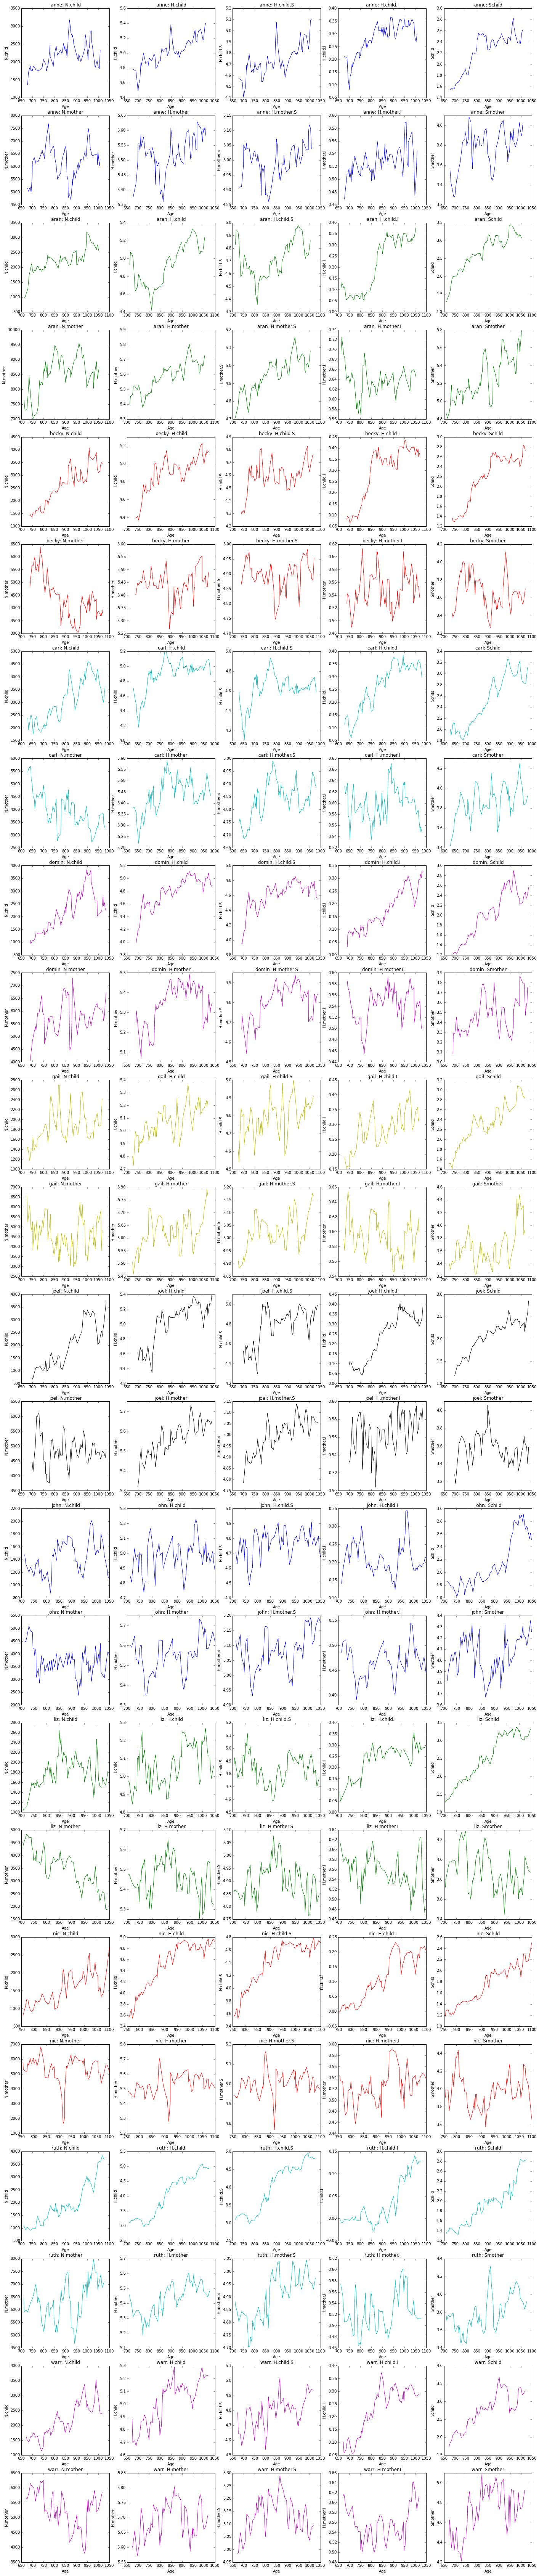

NameError: name 'beaker' is not defined

In [36]:
%matplotlib inline
from pandas import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Read data as a ssv (space-separated file)

df = pandas.read_csv("/Users/dspoka/Desktop/moscoso/nltk_childes/NLTKCHILDES/morph-eng.csv", delimiter= ',')

# Sort data by children alphabetically, then age increasing
sorted_df = df.sort(columns=['Child', 'Age'])

# sorted_df.to_csv("/Users/jeremyirvin/Desktop/SeniorThesis/Childes/nltk_childes/sorted-morph-eng.csv", sep = ' ');

# Get list of the names of the children
name_list = Series(sorted_df['Child']).unique()

# Sort the name list
sorted_name_list = sorted(name_list)

# Get list of the names of the columns
column_list = list(sorted_df.columns.values)

# Remove the column name 'Child' because it contains strings
column_list.remove('Child')

# Convert all other columns to floats
sorted_df[column_list] = sorted_df[column_list].astype(float)

# Create a list of data frames corresponding to each child
child_split_df = {}
for child in sorted_name_list:
    child_split_df[child] = sorted_df[sorted_df['Child'] == child]

# Plot the data nicely    
color_list = ['b','g','r','c','m','y','k'] 
    
# Define a function which plots a certain statistic for a certain child
def plot_stat(axarr, name, child_split_df, stat, row_num, column_num, color_num):
    axarr[row_num, column_num].plot((child_split_df[name])['Age'],  (child_split_df[name])[stat], linestyle = '-', color=color_list[color_num % 7])
    axarr[row_num, column_num].set_xlabel('Age')
    axarr[row_num, column_num].set_ylabel(stat)
    axarr[row_num, column_num].set_title(name + ": " + stat)

column_list.remove('Age')
name_num = 1

fig, axarr = plt.subplots(2 * len(name_list), len(column_list)/2)
fig.set_size_inches(24, 120)
row_num = 0
color_num = 0

for name in name_list:
    column_num = 0
    for stat in column_list:
        plot_stat(axarr, name, child_split_df, stat, row_num, column_num, color_num)
        column_num += 1
        if(column_num == len(column_list)/2):
            row_num += 1
            column_num = 0
    color_num += 1

plt.show()
beaker.dict_child_df = child_split_df